### Name: Altaf Ahmad
### Roll : 18MA20005
# Solving Non Linear differential equations using the block tridiagonal System of Equations with the help of Newton - Raphson Technique


1. Solve the diffferential equaiton <br> 
$f''' + f f''  + 1 - (f')^2 = 0, \; f(0) =0 , f'(0) = 0, f'(10) =1$

Let's assume, $F = f' \Rightarrow $ the equation becomes : $$F'' +fF' +1 -F^2 = 0, \; f(0) = 0, F(0) = 0, F(10) = 1 $$
Now, discretizing these equations, we get $$ 
g_a = f_i - f_{i-1} - \frac{h \times (F_i + F_{i-1})}{2} \;\rightarrow (a)
$$
$$ 
g_b = \frac{F_{i+1} - 2 \times F_{i} + F_{i-1}}{h^2} + f_i \frac{F_{i+1} - F_{i-1}}{2h} + 1 - F_i^2 \;\rightarrow (b)
$$
Now, we have to solve $ a \; \And \; b $ set of equations. <br>
At any iteration $(k+1)$, we have, $$
f_i^{(k+1) } = f_i^{(k) } + \Delta f_i \; \And  \; F_i^{(k+1) } = F_i^{(k) } + \Delta F_i 
$$

So, for any iteration $(k+1 )$, we have, $$
g_a^{(k+1)} = g_a^{(k)} + \frac{\partial g_a}{\partial f_{i-1}} \bigg|^{(k)}\Delta f_{i-1} + \frac{\partial g_a}{\partial f_{i}} \bigg|^{(k)}\Delta f_{i} + \frac{\partial g_a}{\partial f_{i+1}} \bigg|^{(k)}\Delta f_{i+1} + \frac{\partial g_a}{\partial F_{i-1}} \bigg|^{(k)}\Delta F_{i-1} + \frac{\partial g_a}{\partial F_{i}} \bigg|^{(k)}\Delta F_{i} + \frac{\partial g_a}{\partial F_{i+1}} \bigg|^{(k)}\Delta F_{i+1} = 0
$$ And , 
 $$
g_b^{(k+1)} = g_b^{(k)} + \frac{\partial g_b}{\partial f_{i-1}} \bigg|^{(k)}\Delta f_{i-1} + \frac{\partial g_b}{\partial f_{i}} \bigg|^{(k)}\Delta f_{i} + \frac{\partial g_b}{\partial f_{i+1}} \bigg|^{(k)}\Delta f_{i+1} + \frac{\partial g_b}{\partial F_{i-1}} \bigg|^{(k)}\Delta F_{i-1} + \frac{\partial g_b}{\partial F_{i}} \bigg|^{(k)}\Delta F_{i} + \frac{\partial g_b}{\partial F_{i+1}} \bigg|^{(k)}\Delta F_{i+1} = 0
$$

Now, consider, $X_i = \begin{bmatrix}\Delta f_i \\ \Delta F_i \end{bmatrix} , A_i = \begin{bmatrix} \frac{\partial g_a}{\partial f_{i-1}} \bigg|^{(k)} & \frac{\partial g_a}{\partial F_{i-1}} \bigg|^{(k)}\\
\frac{\partial g_b}{\partial f_{i-1}} \bigg|^{(k)} & \frac{\partial g_b}{\partial F_{i-1}} \bigg|^{(k)}\end{bmatrix}, B_i = \begin{bmatrix} \frac{\partial g_a}{\partial f_{i}} \bigg|^{(k)} & \frac{\partial g_a}{\partial F_{i}} \bigg|^{(k)}\\
\frac{\partial g_b}{\partial f_{i}} \bigg|^{(k)} & \frac{\partial g_b}{\partial F_{i}} \bigg|^{(k)}\end{bmatrix} , \\ C_ i = \begin{bmatrix} \frac{\partial g_a}{\partial f_{i+1}} \bigg|^{(k)} & \frac{\partial g_a}{\partial F_{i+1}} \bigg|^{(k)}\\
\frac{\partial g_b}{\partial f_{i+1}} \bigg|^{(k)} & \frac{\partial g_b}{\partial F_{i+1}} \bigg|^{(k)}\end{bmatrix} , D_i =  \begin{bmatrix} -g_a^{(k)} \\ -g_b^{(k)} \end{bmatrix} \\ $<br>
So, the above equations can be written as 
$$ 
A_i X_{i-1} + B_i X_i + C_i X_{i+1} = D_i
$$

Here, we have obtained a Block Tri Diagonal system which can be solved using the modification of the thomas algorithm

In [31]:
import numpy as np
from matplotlib import pyplot as plt 

First, we have to define $ g_a, \;g_b$  and it's partial derivatives with $f_{i-1}, f_i, f_{i+1},F_{i-1}, F_i \; \And \; F_{i+1} $

In [2]:
def g_a(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = f_i - f_i_minus - h* ((F_i + F_i_minus)/2.0)
    return k
def g_a_dash_f_minus(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = -1.0
    return k
def g_a_dash_f_i(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = 1.0
    return k
def g_a_dash_f_plus(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = 0.0
    return k
def g_a_dash_F_minus(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = -h/2
    return k
def g_a_dash_F_i(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = -h/2
    return k
def g_a_dash_F_plus(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = 0.0
    return k

def g_b(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = ((F_i_plus - 2 * F_i + F_i_minus)/ (h*h)) + f_i *((F_i_plus - F_i_minus)/ (2*h)) + 1 - F_i*F_i
    return k
def g_b_dash_f_minus(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = 0.0
    return k
def g_b_dash_f_i(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = (F_i_plus - F_i_minus)/ (2*h)
    return k
def g_b_dash_f_plus(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = 0.0
    return k
def g_b_dash_F_minus(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = (1/(h*h)) - (f_i/(2*h))
    return k
def g_b_dash_F_i(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = (-2/(h*h)) - 2 * F_i
    return k
def g_b_dash_F_plus(f_i_minus, f_i , f_i_plus,F_i_minus, F_i , F_i_plus, h, x_i):
    k = (1/(h*h)) + (f_i/(2*h))
    return k

Now, we have to check for the value of $ h \, \And\,  x_0, x_n , n$

In [45]:
h = 1
x_0 = 0
x_n = 10
n = int((x_n- x_0)/h  + 0.5 )
x = np.array([])
for i in range(n+1):
    x = np.append(x, i*h)

Now, we have to place the initial guess for $ f_i \; \And \; F_i \; i = 1,2,3...,n-1$

In [37]:
f_0 = 0
F_0 = 0
F_n = 1.0
del_F = (F_n - F_0)/n
f_elements = np.array([])
F_elements = np.array([])
k = F_0
for i in range(n+1):
    f_elements = np.append(f_elements, 0)
    F_elements = np.append(F_elements, k)
    k = k + del_F

In [7]:
error = 0.00001
diff = 1

Now, we define our matrices $A_{i}, B_{i}, C_{i}\,  \And\;  D_{i}  $

In [12]:
A = np.array([ [[g_a_dash_f_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
B = np.array([ [[g_a_dash_f_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
C = np.array([ [[g_a_dash_f_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
D = np.array([ [[-g_a(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[-g_b(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
print("A_1 =" )
print(A)
print("B_1 =" )
print(B)
print("C_1 =" )
print(C)
print("D_1 =" )
print(D)

A_1 =
[[[-1.  -0.5]
  [ 0.   1. ]]]
B_1 =
[[[ 1.  -0.5]
  [ 0.1 -2.2]]]
C_1 =
[[[0. 0.]
  [0. 1.]]]
D_1 =
[[[ 0.05]
  [-0.99]]]


In [13]:
for i in range(1,n):
    A = np.append(A,[ [[g_a_dash_f_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
    B = np.append(B,[ [[g_a_dash_f_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
    C = np.append(C,[ [[g_a_dash_f_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
    D = np.append(D,[ [[-g_a(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[-g_b(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)

Now, we will define the $X_i$ matrices that will finally store the answers.

In [18]:
X_ans = np.array([[[0],[0]]],dtype = float)
for i in range(n):
    X_ans = np.append(X_ans, [[[0],[0]]] ,axis = 0)

Here, we need to add the initial conditions, i.ie <br>
$X_0 = \begin{bmatrix}0 \\ 0 \end{bmatrix} \And\;  X_n = \begin{bmatrix}0 \\ 0 \end{bmatrix}$

Now, we enter the loop

Now, we need to modify the value of $ D_1$ because we have $ A_1 X_0 + B_1X_1 + C_1 X_2 = D_1 $ and we already know the value of $X_0$, so it can be shifted to the RHS <br>$ \Rightarrow B_1X_1 + C_1 X_2 = D_1 - A_1 X_0 \;\Rightarrow D_1 = D_1 - A_1 X_0 \;$

In [20]:
D[1] = D[1] - np.dot(A[1], X_ans[0])

Now, we will transform the given equations into the form : $$ 
X_i + C'_i X_{i+1}= D'_i \; i =1,2,..,n-1
$$
where, $C'_1 = (B_1)^{-1} C_1 \; \And \; D'_1 = (B_1)^{-1} D_1$ <br> and 
$ B'_i = (B_i - A_i C'_{i-1}) $ <br>$C'_i =  (B'_i)^{-1} C_i $ <br>$ D'_i = (B'_i)^{-1} (D_i - A_iD'_{i-1}) $ <br> for $ i = 2,3,..., n-1$ 

In [21]:
cc_dash = np.dot(np.linalg.inv(B[1]),C[1] )
dd_dash = np.dot(np.linalg.inv(B[1]),D[1] )
C_dash = np.array([cc_dash])
D_dash = np.array([dd_dash])
C_dash = np.append(C_dash, [cc_dash], axis = 0)
D_dash = np.append(D_dash, [dd_dash], axis = 0)
for i in range(2,n):
    b_dash = (B[i] - np.dot(A[i],C_dash[i-1]) )
    b_dashinv = np.linalg.inv(b_dash)
    cc_dash = np.dot(b_dashinv,C[i])
    dd_dash = np.dot(b_dashinv , D[i] - np.dot(A[i],D_dash[i-1]))
    C_dash = np.append(C_dash, [cc_dash], axis = 0)
    D_dash = np.append(D_dash, [dd_dash], axis = 0)

Now, we have $ X_{n-1} = (B_{n-1}- A_{n-1}C'_{n-2})^{-1} (D_{n-1}- C_{n-1}X_n -A_{n-1}D'_{n-2})$

In [23]:
b_dash = (B[n-1] - np.dot(A[n-1],C_dash[n-2]) )
b_dashinv = np.linalg.inv(b_dash)
final_ans = np.dot(b_dashinv, D[n-1] - np.dot(C[n-1],X_ans[n]) - np.dot(A[n-1], D_dash[n-2]))
X_ans[n-1] =  np.array(final_ans) 

After that we have, $X_i = D'_i-C'_iX_{i+1} \; \forall \,  i =(n-2), (n-3), ... , 1$

In [25]:
for i in range(n-2, 0,-1):
    #D_dash[i] - np.dot(C_dash[i], X_ans[i+1])
    X_ans[i] = np.array(D_dash[i] - np.dot(C_dash[i], X_ans[i+1]))
    print("X["+str(i) +"] = ")
    print(X_ans[i])

X[8] = 
[[15.1648056 ]
 [ 1.09906354]]
X[7] = 
[[13.21793271]
 [ 1.29468225]]
X[6] = 
[[11.18506017]
 [ 1.47106283]]
X[5] = 
[[9.07242237]
 [1.65421278]]
X[4] = 
[[6.87814934]
 [1.83433328]]
X[3] = 
[[4.63392996]
 [1.95410547]]
X[2] = 
[[2.47040325]
 [1.87294795]]
X[1] = 
[[0.71696464]
 [1.33392928]]


Now, the f_elements and F_elements need to be updated

In [26]:
for i in range(1,n):
        f_elements[i] = f_elements[i] + X_ans[i][0][0]
        F_elements[i] = F_elements[i] + X_ans[i][1][0]

This has to be done again and again. We will make use of a loop to find this 


 Iteration : 1

 Iteration : 2

 Iteration : 3

 Iteration : 4

 Iteration : 5

 Iteration : 6
The solution converged to a final answer 
 And the values of f are 
f(0.0) = 0.0
F(0.0) = 0.0

f(1.0) = 0.39043962253931846
F(1.0) = 0.7808792450786369

f(2.0) = 1.2709693835224427
F(2.0) = 0.9801802768876116

f(3.0) = 2.2613612057732966
F(3.0) = 1.000603367614096

f(4.0) = 3.2616215368650763
F(4.0) = 0.9999172945694632

f(5.0) = 4.261589648134574
F(5.0) = 1.0000189279695324

f(6.0) = 5.261596267691999
F(6.0) = 0.9999943111453187

f(7.0) = 6.261594540417186
F(7.0) = 1.0000022343050556

f(8.0) = 7.261595272102825
F(8.0) = 0.9999992290662226

f(9.0) = 8.261595188340909
F(9.0) = 1.000000603409944



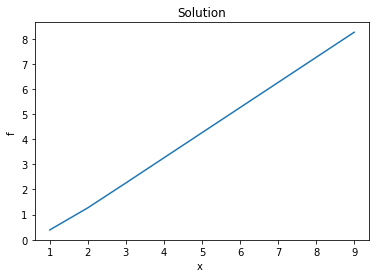

In [46]:
f_0 = 0
F_0 = 0
F_n = 1.0
del_F = (F_n - F_0)/n
f_elements = np.array([])
F_elements = np.array([])
k = F_0
error = 0.00001
diff = 1
for i in range(n+1):
    f_elements = np.append(f_elements, 0)
    F_elements = np.append(F_elements, k)
    k = k + del_F
iteration = 0
while(diff > error):
    iteration = iteration +1
    if(iteration > 20):
        break
    print('\n Iteration : ' + str(iteration) )
    A = np.array([ [[g_a_dash_f_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
    B = np.array([ [[g_a_dash_f_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
    C = np.array([ [[g_a_dash_f_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
    D = np.array([ [[-g_a(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[-g_b(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
    for i in range(1,n):
        A = np.append(A,[ [[g_a_dash_f_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
        B = np.append(B,[ [[g_a_dash_f_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
        C = np.append(C,[ [[g_a_dash_f_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
        D = np.append(D,[ [[-g_a(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[-g_b(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)

    X_ans = np.array([[[0],[0]]],dtype = float)
    for i in range(n):
        X_ans = np.append(X_ans, [[[0],[0]]] ,axis = 0)
    #print('Here, we have : ')
    #for i in range(1,n):
    #    print(str(A[i]) + str(X_ans[i-1]) + ' + ' + str(B[i])+ str(X_ans[i]) + ' + ' + str(C[i]) + str(X_ans[i+1]) + ' = '+ str(D[i]) )
    D[1] = D[1] - np.dot(A[1], X_ans[0])
    cc_dash = np.dot(np.linalg.inv(B[1]),C[1] )
    dd_dash = np.dot(np.linalg.inv(B[1]),D[1] )
    C_dash = np.array([cc_dash])
    D_dash = np.array([dd_dash])
    C_dash = np.append(C_dash, [cc_dash], axis = 0)
    D_dash = np.append(D_dash, [dd_dash], axis = 0)
    for i in range(2,n):
        b_dash = (B[i] - np.dot(A[i],C_dash[i-1]) )
        b_dashinv = np.linalg.inv(b_dash)
        cc_dash = np.dot(b_dashinv,C[i])
        dd_dash = np.dot(b_dashinv , D[i] - np.dot(A[i],D_dash[i-1]))
        C_dash = np.append(C_dash, [cc_dash], axis = 0)
        D_dash = np.append(D_dash, [dd_dash], axis = 0)
    b_dash = (B[n-1] - np.dot(A[n-1],C_dash[n-2]) )
    b_dashinv = np.linalg.inv(b_dash)
    final_ans = np.dot(b_dashinv, D[n-1] - np.dot(C[n-1],X_ans[n]) - np.dot(A[n-1], D_dash[n-2]))
    X_ans[n-1] =  np.array(final_ans) 
    #print("X["+str(n-1) +"] = ")
    #print(X_ans[n-1])
    for i in range(n-2, 0,-1):
        #D_dash[i] - np.dot(C_dash[i], X_ans[i+1])
        X_ans[i] = np.array(D_dash[i] - np.dot(C_dash[i], X_ans[i+1]))
        #print("X["+str(i) +"] = ")
        #print(X_ans[i])

    diff = np.max(np.abs(X_ans))
    for i in range(1,n):
        f_elements[i] = f_elements[i] + X_ans[i][0][0]
        F_elements[i] = F_elements[i] + X_ans[i][1][0]

if(iteration < 20):
    print('The solution converged to a final answer \n And the values of f are ')
    for i in range(n):
        print('f(' +str(x[i])+') = ' +str(f_elements[i]) )
        print('F(' +str(x[i])+') = ' +str(F_elements[i]) + str('\n')) 
    y_axis = np.array([],dtype = float)
    x_axis = np.array([],dtype = float)
    for i in range(1,n):
        x_axis = np.append(x_axis, x[i])
        y_axis = np.append(y_axis, f_elements[i])
    plt.title("Solution") 
    plt.xlabel("x ") 
    plt.ylabel("f ") 
    plt.plot(x_axis,y_axis) 
    plt.show()
    

Now, for a different value of h

In [48]:
h = 0.1
x_0 = 0
x_n = 10
n = int((x_n- x_0)/h  + 0.5 )
x = np.array([])
for i in range(n+1):
    x = np.append(x, i*h)


 Iteration : 1

 Iteration : 2

 Iteration : 3

 Iteration : 4

 Iteration : 5

 Iteration : 6
The solution converged to a final answer 
 And the values of f are 
f(0.0) = 0.0
F(0.0) = 0.0

f(0.1) = 0.005914678830995267
F(0.1) = 0.11829357661990533

f(0.2) = 0.023162360455530103
F(0.2) = 0.2266600558707914

f(0.30000000000000004) = 0.05076039047060412
F(0.30000000000000004) = 0.325300544430689

f(0.4) = 0.08775153964396078
F(0.4) = 0.41452243903644426

f(0.5) = 0.13321362581593255
F(0.5) = 0.49471928440299123

f(0.6000000000000001) = 0.18626720559033225
F(0.6000000000000001) = 0.5663523110850024

f(0.7000000000000001) = 0.2460815005270152
F(0.7000000000000001) = 0.6299335876486561

f(0.8) = 0.3118787169674288
F(0.8) = 0.6860107411596155

f(0.9) = 0.3829369147223141
F(0.9) = 0.7351532139380914

f(1.0) = 0.45859157708034093
F(1.0) = 0.7779400332224449

f(1.1) = 0.538236032441179
F(1.1) = 0.8149490739943165

f(1.2000000000000002) = 0.6213208758355451
F(1.2000000000000002) = 0.84674779389

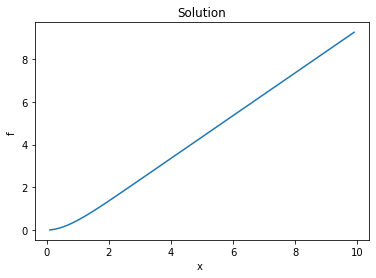

In [49]:
f_0 = 0
F_0 = 0
F_n = 1.0
del_F = (F_n - F_0)/n
f_elements = np.array([])
F_elements = np.array([])
k = F_0
error = 0.00001
diff = 1
for i in range(n+1):
    f_elements = np.append(f_elements, 0)
    F_elements = np.append(F_elements, k)
    k = k + del_F
iteration = 0
while(diff > error):
    iteration = iteration +1
    if(iteration > 20):
        break
    print('\n Iteration : ' + str(iteration) )
    A = np.array([ [[g_a_dash_f_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_minus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
    B = np.array([ [[g_a_dash_f_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_i(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
    C = np.array([ [[g_a_dash_f_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]),g_a_dash_F_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[g_b_dash_f_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1]), g_b_dash_F_plus(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
    D = np.array([ [[-g_a(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])],[-g_b(f_elements[0], f_elements[1] ,f_elements[2] , F_elements[0], F_elements[1], F_elements[2] , h, x[1])]] ])
    for i in range(1,n):
        A = np.append(A,[ [[g_a_dash_f_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_minus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
        B = np.append(B,[ [[g_a_dash_f_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_i(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
        C = np.append(C,[ [[g_a_dash_f_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]),g_a_dash_F_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[g_b_dash_f_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i]), g_b_dash_F_plus(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)
        D = np.append(D,[ [[-g_a(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])],[-g_b(f_elements[i-1], f_elements[i] ,f_elements[i+1] , F_elements[i-1], F_elements[i], F_elements[i+1] , h, x[i])]] ], axis=0)

    X_ans = np.array([[[0],[0]]],dtype = float)
    for i in range(n):
        X_ans = np.append(X_ans, [[[0],[0]]] ,axis = 0)
    #print('Here, we have : ')
    #for i in range(1,n):
    #    print(str(A[i]) + str(X_ans[i-1]) + ' + ' + str(B[i])+ str(X_ans[i]) + ' + ' + str(C[i]) + str(X_ans[i+1]) + ' = '+ str(D[i]) )
    D[1] = D[1] - np.dot(A[1], X_ans[0])
    cc_dash = np.dot(np.linalg.inv(B[1]),C[1] )
    dd_dash = np.dot(np.linalg.inv(B[1]),D[1] )
    C_dash = np.array([cc_dash])
    D_dash = np.array([dd_dash])
    C_dash = np.append(C_dash, [cc_dash], axis = 0)
    D_dash = np.append(D_dash, [dd_dash], axis = 0)
    for i in range(2,n):
        b_dash = (B[i] - np.dot(A[i],C_dash[i-1]) )
        b_dashinv = np.linalg.inv(b_dash)
        cc_dash = np.dot(b_dashinv,C[i])
        dd_dash = np.dot(b_dashinv , D[i] - np.dot(A[i],D_dash[i-1]))
        C_dash = np.append(C_dash, [cc_dash], axis = 0)
        D_dash = np.append(D_dash, [dd_dash], axis = 0)
    b_dash = (B[n-1] - np.dot(A[n-1],C_dash[n-2]) )
    b_dashinv = np.linalg.inv(b_dash)
    final_ans = np.dot(b_dashinv, D[n-1] - np.dot(C[n-1],X_ans[n]) - np.dot(A[n-1], D_dash[n-2]))
    X_ans[n-1] =  np.array(final_ans) 
    #print("X["+str(n-1) +"] = ")
    #print(X_ans[n-1])
    for i in range(n-2, 0,-1):
        #D_dash[i] - np.dot(C_dash[i], X_ans[i+1])
        X_ans[i] = np.array(D_dash[i] - np.dot(C_dash[i], X_ans[i+1]))
        #print("X["+str(i) +"] = ")
        #print(X_ans[i])

    diff = np.max(np.abs(X_ans))
    for i in range(1,n):
        f_elements[i] = f_elements[i] + X_ans[i][0][0]
        F_elements[i] = F_elements[i] + X_ans[i][1][0]

if(iteration < 20):
    print('The solution converged to a final answer \n And the values of f are ')
    for i in range(n):
        print('f(' +str(x[i])+') = ' +str(f_elements[i]) )
        print('F(' +str(x[i])+') = ' +str(F_elements[i]) + str('\n')) 
    y_axis = np.array([],dtype = float)
    x_axis = np.array([],dtype = float)
    for i in range(1,n):
        x_axis = np.append(x_axis, x[i])
        y_axis = np.append(y_axis, f_elements[i])
    plt.title("Solution") 
    plt.xlabel("x ") 
    plt.ylabel("f ") 
    plt.plot(x_axis,y_axis) 
    plt.show()
    